%%html
<style>
    .myblock {
        font-style: normal;
        text-align: justify;
        margin-left: 0px;
        margin-right: 10px;
        margin-top: 10px;
        margin-bottom: 0px;
        padding: 10px;
        display: block;
        border-radius: 20px;
    }
    
    .exercise {
        background-color: #AFEEEE;
    }
    
    .theorem {
        background-color: #FEC4A3;
    }
</style>

<center style="font-size:25px;padding-bottom:10px;"><b>Continuous stochastic processes</b></center>
<center style="font-size:22px;padding-bottom:10px;"><b>Homework 1</b></center>

<center style="font-size:20px;padding-bottom:10px;">José Antonio Álvarez Ocete</center>

<center style="font-size:20px;">Francisco Javier Sáez Maldonado</center>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import imports.arrival_process_simulation as arrival

from scipy.special import factorial, i0
from scipy import stats
from collections import Counter
from sklearn.neighbors import KernelDensity

<div class="myblock exercise">
<h1>Exercise 1</h1> <a href='#Ejercicio-1' class='anchor-link'>¶</a>

A Poisson process with rate $\lambda$ can be defined as a counting process $\{N(t); t \ge0 \}$ with the following properties:
    
(a) $N(0) = 0$

(b) $N(t)$  has independent and stationary increments.
    
(c) Let $\Delta N(t) = N(t + \Delta t) - N(t)$ with $\Delta t \rightarrow 0^+$. The following relations hold:
    
$$
\begin{align}
    \mathbb P[\Delta N(t) = 0] & \; = 1 - \lambda \Delta t + o(\Delta t) \qquad & (1) \\ 
    \mathbb P[\Delta N(t) = 1] & \; = \lambda \Delta t + o(\Delta t) \qquad & (2) \\
    \mathbb P[\Delta N(t) \ge 2] & \; = o(\Delta t) \qquad & (3)
\end{align}
$$
    
<b>a)</b> From this definition show that

$$
    \mathbb P[N(t) = n] = \frac{1}{n!} \lambda^n t^n e^{-\lambda t} \qquad (4) \\
$$  
     
<b>b)</b> Illustrate the validity of the derivation by comparing the empirical distribution obtained in a simulation of the Poisson process and the theorical distribution of $\mathbb P[N(t) = n]$ given by the equation (4) for the values $\lambda=10$ and $t=2$.
</div>

### Solution to a)

We will prove equation (4) by an inductive procedure.

#### Case n=0:

From statement (c) we know that $N(t + \Delta t) = \Delta N(t) + N(t)$. Then:

$$
\begin{align}
    \mathbb P[N(t + \Delta t) = 0] & = \mathbb P[\Delta N(t) + N(t) = 0] \\ 
    & \stackrel{(*)}{=} \mathbb P[\Delta N(t) = 0] \; \mathbb P[N(t) = 0] \\
    & \stackrel{(1)}{=} \mathbb P[\Delta N(t) = 0] \;  (1 - \lambda \Delta t + o(\Delta t)) \\
\end{align}
$$

where in $(*)$ we statement (b) and the fact that $N(t), \Delta N(t) \ge 0$. Rearranging the previous terms we obtain:

$$
    \frac{ \mathbb P[N(t + \Delta t) = 0] - \mathbb P[\Delta N(t) = 0] } {\Delta t} = - \lambda \mathbb P[\Delta N(t) = 0] + \frac{o(\Delta t)}{\Delta t} \mathbb P[\Delta N(t) = 0]
$$

Taking $\lim_{\Delta t \rightarrow 0^+}$ and using the definition of derivative we obtain:

$$
    \frac{\text d} {\text dt} \mathbb P[\Delta N(t) = 0] = - \lambda \mathbb P[\Delta N(t) = 0]
$$

This is a linear homogeneus diferential equation, which only solution that satifies the initial condition $\mathbb P[\Delta N(t) = 0] = 1$ is

$$
    \mathbb P[\Delta N(t) = 0] = e^{-\lambda t}
$$

#### Case n>0:

Let's prove the $n$-case with our induction hypothesis for $n-1$:

$$
    \mathbb P[N(t) = n-1] = \frac{1}{(n-1)!} \lambda^{n-1} t^{n-1} e^{-\lambda t} \qquad (5) \\
$$  

We begin with the same development as in the base case, but for and arbitrary $n$:

$$
\begin{align}
    \mathbb P[N(t + \Delta t) = n] & = \mathbb P[\Delta N(t) + N(t) = n] \\ 
    & \stackrel{(*)}{=} \sum_{k=0}^n \mathbb P[\Delta N(t) = k] \; \mathbb P[N(t) = n-k] \\
    & = \mathbb P[\Delta N(t) = 0] \; \mathbb P[N(t) = n] \\
    & + \mathbb P[\Delta N(t) = 1] \; \mathbb P[N(t) = n-1] \\
    & + \sum_{k=2}^n \mathbb P[\Delta N(t) = k] \; \mathbb P[N(t) = n-k] \\
    & \stackrel{(1,2,3)}{=} (1 - \lambda \Delta t + o(\Delta t)) \; \mathbb P[N(t) = n] \\
    & + (\lambda \Delta t + o(\Delta t)) \; \mathbb P[N(t) = n-1] \\
    & + o(\Delta t) \sum_{k=2}^n \mathbb \; \mathbb P[N(t) = n-k] \\
    & = (1 - \lambda \Delta t ) \; \mathbb P[N(t) = n] + \lambda \Delta t \; \mathbb P[N(t) = n-1] \\
    & + o(\Delta t) \sum_{k=0}^n \mathbb \; \mathbb P[N(t) = n-k] \\
\end{align}
$$

where in $(*)$ we statement (b) and the fact that $N(t), \Delta N(t) \ge 0$. Rearranging the previous terms we obtain:

$$
    \frac{ \mathbb P[N(t + \Delta t) = n] - \mathbb P[\Delta N(t) = n] } {\Delta t} = - \lambda \bigg( \mathbb P[\Delta N(t) = n] - \mathbb P[\Delta N(t) = n-1] \bigg) + \frac{o(\Delta t)}{\Delta t} \sum_{k=0}^n \mathbb \; \mathbb P[N(t) = n-k]
$$

Taking $\lim_{\Delta t \rightarrow 0^+}$ and using the definition of derivative we obtain:

$$
    \frac{\text d} {\text dt} \mathbb P[\Delta N(t) = n] = - \lambda \bigg( \mathbb P[\Delta N(t) = n] - \mathbb P[\Delta N(t) = n-1] \bigg)
$$

Using the induction hypothesis (6) we obtain our differential equation:

$$
    \frac{\text d} {\text dt} \mathbb P[\Delta N(t) = n] = - \lambda \bigg( \mathbb P[\Delta N(t) = n] - \frac{1}{(n-1)!} \lambda^{n-1} t^{n-1} e^{-\lambda t} \bigg)
$$

Let us rename our space variable in the previous equation understand it better. We are looking for a function $y(t)$ such that

$$
    \frac{\text d} {\text dt} y(t) = - \lambda \bigg( y(t) - \frac{1}{(n-1)!} \lambda^{n-1} t^{n-1} e^{-\lambda t} \bigg) \qquad (6) \\
$$

This differential equation is not linear and, as such, we can solve it using separated variables as we did in the base case. We may use Picard-Lindelöf's Theorem to prove that the solution is unique, and then prove that (4) is a solution to the equation (6). Thus, proving that is the only solution.

<div class="myblock theorem">
<h1>Theorem (Picard Lindelöf's)</h1>

Consider the initial value problem

$$
    \frac{\text d} {\text dt} y(t) = f(t,y(t)), \qquad y(t_{0})=y_{0}.
$$
    
Suppose $f$ is uniformly Lipschitz continuous in $y$ (meaning the Lipschitz constant can be taken independent of $t$) and continuous in $t$, then there exists a unique solution $y(t)$ to the initial value problem.
</div>

Since our function $f(t,y(t))$ is continuous in $t$, we just need to prove that is uniformly Lipschitz continuous in $y$.

$$
    \frac{\text d} {\text dy} f(t,y(t)) = - \lambda \in \mathbb R
$$

Since the derivative with respect to $y$ of $f$ is constant, $f$ is uniformly Lipschitz continuous and our initial value problem given by teh equation (6) and the initial condition $\mathbb P[\Delta N(t) = n] = 0$ is unique.

We just need to prove that (4) is a solution to the differential equation (6). Let $x(t)$ be

$$
    x(t) \equiv \frac{1}{n!} \lambda^n t^n e^{-\lambda t}.
$$  

Then,

$$
\begin{align}
    \frac{\text d} {\text dt} x(t) & = \frac{-\lambda^{n+1} t^{n}}{n!} e^{-\lambda t} + \frac{\lambda^{n} t^{n-1}}{(n-1)!} e^{-\lambda t} \\ 
    & = -\lambda \bigg(\frac{-\lambda^{n} t^{n}}{n!} e^{\lambda t} - \frac{\lambda^{n-1} t^{n-1}}{(n-1)!} e^{-\lambda t} \bigg) \\
    & = -\lambda \bigg(x(t) - \frac{\lambda^{n-1} t^{n-1}}{(n-1)!} e^{-\lambda t} \bigg)
\end{align}
$$

Proving that $x(t)$ as defined in equation (4) is a solution to the differential equation.

### Solution to b)

In order to simulate this Poisson process we will use the provided function $simulate\_poisson$. Since it returns the different times of arrival of a simulated Poisson process with the given parameters, we simply fix $t_1=2$ and count the number of events that ocurred in that legnth of time.

By repeating this process $n\_samples=10**4$ times, we obtain different values of $\mathbb P[N(2) = n]$. Finally, we use a $Counter$ to wrap the number of times $k$ events happened.

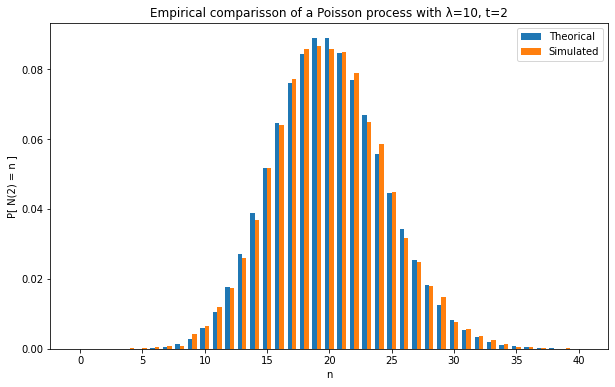

In [3]:
def exercise_1(t=2, max_n=40, lamb=10, n_samples=10**4):
    # Theoretical
    ns = np.arange(max_n+1)*1.0
    y_theoretical = (lamb*t)**ns * np.exp(-lamb*t) / factorial(ns)

    # Simulation
    counter = Counter([ len(arrival_times) for arrival_times in arrival.simulate_poisson(0, t, lamb, n_samples)])
    total_count = sum(counter.values())
    y_simulated = [counter[i]/total_count for i in ns]

    # Plotting
    width = 0.35
    plt.figure(figsize=(10, 6))
    plt.bar(ns - width/2, y_theoretical, width, label='Theorical')
    plt.bar(ns + width/2, y_simulated, width, label='Simulated')

    plt.xlabel('n')
    plt.ylabel('P[ N(2) = n ]')
    plt.title('Empirical comparisson of a Poisson process with λ=10, t=2')
    plt.legend()

exercise_1()

<div class="myblock exercise">
<h1>Exercise 2</h1> <a href='#Ejercicio-2' class='anchor-link'>¶</a>

Simulate a Poisson process with $\lambda = 5$. From these simulations show for different values of $n \in \{1,2,5,10\}$ that the probability density of the $n$-th arrival is

$$
    f_{S_n} (t) = \frac{1}{(n-1)!} \lambda^n t^{n-1} e^{-\lambda t}
$$
</div>

We will make use of kernel density estimations to approximate the theorical probability density function of the $n$th arrival, which actually matches the Erlang distribution. The $kde\_bandwidth$ parameter dictates the bandwidth of each kernemini-kernel used in the estimation. For lower values, a better estimation is obtained for lower $n$s, which have huge peaks in small areas. However, the smaller we make that parameter, the more we overfit, obtaining less smooth estimations.

In order to sample the $s_n$ time we re-use the provided function $simulate\_poisson$, and grab the $(n$-$th - 1)$ element. We will sample that value $n\_samples\_kde=10^4$ times for a good estimation. 

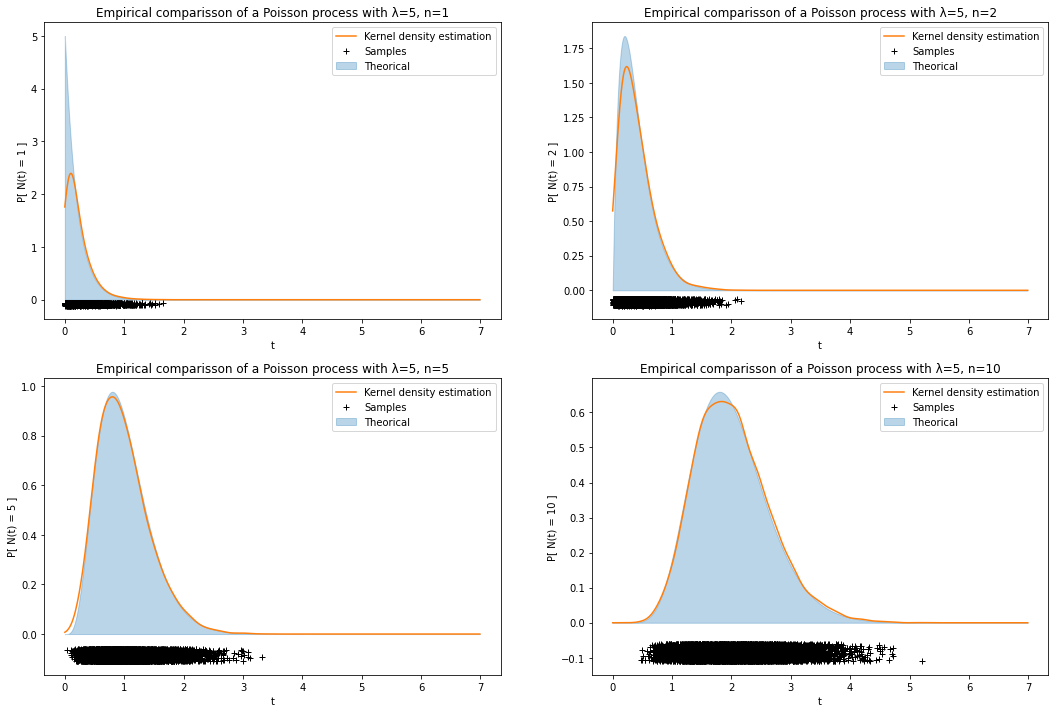

In [5]:
def plot_kde_in_axis(axis, ts, pdf, pdf_kde, samples, lamb, n):
    # Plot pdf and estimation
    axis.fill_between(ts, pdf, alpha=0.3, color='C0', label='Theorical')
    axis.plot(ts, pdf_kde, color='C1', label='Kernel density estimation')

    # Plot little x's near the X axis
    axis.plot(samples[:, 0], -0.06 - 0.05 * np.random.random(samples.shape[0]),
              "+k", label='Samples')

    axis.set_xlabel('t')
    axis.set_ylabel('P[ N(t) = {} ]'.format(n))
    axis.set_title('Empirical comparisson of a Poisson process with λ={}, n={}'.format(lamb, n))
    axis.legend()

def exercise_2(ns=[1,2,5,10], lamb=5, max_t=7, n_samples_kde=10**4, kde_bandwidth=0.1):
    ts = np.arange(max_t, step=0.01)
    _, axis = plt.subplots(2, 2, figsize=(18, 12))

    for ax, n in zip(axis.flatten(), ns):
        # Theorical
        sn_pdf = stats.erlang.pdf(ts, a=n, scale=1/lamb)

        # Kernel Density Estimation
        sn_empirical = [ arrival_times[n-1] for arrival_times in arrival.simulate_poisson(0, max_t, lamb, n_samples_kde)]
        sn_empirical = np.array(sn_empirical).reshape(-1, 1)
        kernel_density_estimatior = KernelDensity(kernel='gaussian', bandwidth=kde_bandwidth).fit(sn_empirical)
        sn_pdf_estimation = np.exp(kernel_density_estimatior.score_samples(np.array(ts).reshape(-1, 1)))

        # Plotting
        plot_kde_in_axis(ax, ts, sn_pdf, sn_pdf_estimation, sn_empirical, lamb, n)
    
exercise_2(kde_bandwidth=0.1)

<div class="myblock exercise">
<h1>Exercise 4</h1> <a href='#Ejercicio-4' class='anchor-link'>¶</a>

Two teams $A$ and $B$ play a soccer match. The number of goals scored by Team $A$ is modeled by a Poisson process $N_{1}(t)$ with rate $\lambda_{1} = 0.02$ goals per minute. The number of goals scored by Team $B$ is modeled by a Poisson process $N_{2}(t)$ with rate $\lambda_{2} = 0.03$ goals per minute. The two processes are assumed to be independent. Let $N(t)$ be the total number of goals in the game up to and including time $t$. The game lasts for $90$ minutes.
    
<b>a)</b> Find the probability that no goals are scored.
    
<b>b)</b> Find the probability that at least two goals are scored in the game.
    
<b>c)</b> Find the probability of the final score being Team $A: 1$, Team $B: 2$.
    
<b>d)</b> Find the probability that they draw.

<b>e)</b> Find the probability that Team B scores the first goal.
    
Confirm your results by writing a Python program that simulates the process and estimate the answers from the simulations.
</div>

### Solution to a)

We know that the number of goals scored in time $t$ by each time follows a satifies

$$
    \mathbb P[N_i(t) = n] = \frac{1}{n!} \lambda_i^n t^n e^{-\lambda_i t} \qquad \forall i \in \{1,2\}
$$  

In particular:

$$
    \mathbb P[N_i(t) = 0] = e^{-\lambda_i t} \qquad \forall i \in \{1,2\}
$$

For this first question we may use the number of goals scored by each time are independent random variables:

$$
    \mathbb P[N_1(90) = 0, N_2(90) = 0] = \mathbb P[N_1(90) = 0] \cdot \mathbb P[ N_2(90) = 0] = e^{-90\lambda_1}  \cdot e^{-90\lambda_2} \approx 0.0111
$$

In order to obtain a numerical approximation to this value we simulate $n\_samples$ matches and use a *lambda* function as condition to see how many of those matches fullfil it. The fracion

$$
    \hat p = \frac{\#\text{Matches that fullfil the condition}}{\#\text{Total matches}}
$$

will be used to estimate questions **a)** to **d)**.

Let us also fix the seed to make the experiments fully reproducible.

In [5]:
def simulate_team_scores(t=90, lamb1=0.02, lamb2=0.03, n_samples=10**5):
    return [ 
        [ len(arrival_times1), len(arrival_times2) ]
        for arrival_times1, arrival_times2
        in zip(arrival.simulate_poisson(0, t, lamb1, n_samples),
               arrival.simulate_poisson(0, t, lamb2, n_samples))
    ]

def estimate_prob(condition, t=90, lamb1=0.02, lamb2=0.03, n_samples=10**5):
    scores = simulate_team_scores(t=t, lamb1=lamb1, lamb2=lamb2, n_samples=n_samples)
    fullfil_condition = np.sum([ condition(score) for score in scores ])
    return 1.0*fullfil_condition / len(scores)

np.random.seed(123)
tie_on_0 = lambda x: x[0] == 0 and x[1] == 0
print('P[N_1(90) = 0, N_2(90) = 0] = {}'.format(estimate_prob(tie_on_0)))

P[N_1(90) = 0, N_2(90) = 0] = 0.01135


### Solution to b)

For this question we may use that $N(t) = N_1(t) + N_2(t)$ is a Possion process with rate $\lambda = \lambda_1 + \lambda_2 = 0.05$:

$$
\begin{align}
    \mathbb P[N_1(90) + N_2(90) \ge 2] & = 1 - \mathbb P[N_1(90) + N_2(90) < 2] \\
    & = 1 - \big( \mathbb P[N(90) = 0 ] + \mathbb P[N(90) = 1 ] \big) \\
    & = 1 - \big( e^{-90\lambda} + 90\lambda e^{-90\lambda} \big) \\
    & \approx 0.9389 \\
    \\ 
\end{align}
$$

We can simulate this value by defining a new *lambda* condition and using the previously defined function: 

In [22]:
at_least_2 = lambda x: x[0] + x[1] >= 2
print('P[N_1(90) + N_2(90) >= 2] = {}'.format(estimate_prob(at_least_2)))

P[N_1(90) + N_2(90) >= 2] = 0.93938


### Solution to c)

This is a straight-forward computation using that both Poisson processes are independent:

$$
\begin{align}
    \mathbb P[N_1(90) = 1, N_2(90) = 2] & = \mathbb P[N_1(90) = 1] \cdot \mathbb P[N_2(90) = 2] \\
    & = 90\lambda_1 e^{-90\lambda_1} \cdot \frac{1}{2} 90^2 \lambda_2^2 e^{-90\lambda_2} \\
    & \approx 0.07289 \\
    \\ 
\end{align}
$$

We can simulate this value by defining a new *lambda* condition and using the previously defined function:

In [23]:
one_and_two = lambda x: x[0] == 1 and x[1] == 2
print('P[N_1(90) = 1, N_2(90) = 2] = {}'.format(estimate_prob(at_least_2)))

P[N_1(90) = 1, N_2(90) = 2] = 0.93877


### Solution to d)

For the theorical resolution of this question we will use the Bessel function with $\eta$ degress of freedom:

$$
    I_\eta(x) = \sum_{k=0}^\infty \frac{1}{k! \cdot \Gamma(k + \eta + 1)} \left( \frac{x}{2} \right)^{2k + \eta}
$$

Recall that if $m$ is an integer, $\Gamma(m) = \; !(m-1)$. Then, assuming $n$ is an integer and taking $\eta=0$:

$$
    I_0(x) = \sum_{k=0}^\infty \frac{1}{!k \cdot \Gamma(k + 1)} \left( \frac{x}{2} \right)^{2k}
    = \sum_{k=0}^\infty \frac{1}{!k \cdot !k} \left( \frac{x}{2} \right)^{2k}
$$

Let us compute the probability:

$$
\begin{align}
    \mathbb P[N_1(90) = N_2(90)] & = \sum_{k=0}^\infty \mathbb P[N_1(90) = k] \cdot \mathbb P[N_2(90) = k] \\
    & = \sum_{k=0}^\infty \mathbb P[N_1(90) = k] \cdot \mathbb P[N_2(90) = k] \\
    & = \sum_{k=0}^\infty \frac{1}{k!} \lambda_1^k t^k e^{-\lambda_1 t} \cdot \frac{1}{k!} \lambda_2^k t^k e^{-\lambda_2 t} \\
    & = e^{-(\lambda_1 + \lambda_2) t} \sum_{k=0}^\infty \frac{1}{k! \cdot k!} (\lambda_1 \lambda_2 t^2)^k\\
    & = e^{-(\lambda_1 + \lambda_2) t} \sum_{k=0}^\infty \frac{1}{k! \cdot k!} \left( \sqrt{\lambda_1 \lambda_2} t \right)^{2k} \\
    & = e^{-(\lambda_1 + \lambda_2) t} \sum_{k=0}^\infty \frac{1}{k! \cdot k!} \left( \frac{2\sqrt{\lambda_1 \lambda_2} t}{2} \right)^{2k} \\
    \\
    & = e^{-(\lambda_1 + \lambda_2) t} \cdot I_0 \left( 2\sqrt{\lambda_1 \lambda_2} t \right) \\
    & \approx 0.1792\\ 
\end{align}
$$

Where in the last step we used *scipiy.special.i0* to compute $I_0(x)$. We can simulate this value by defining a new *lambda* condition and using the previously defined function:

In [24]:
draw = lambda x: x[0] == x[1]
print('P[N_1(90) = N_2(90)] = {}'.format(estimate_prob(draw)))

P[N_1(90) = N_2(90)] = 0.18073


### Solution to e)

For this last question we will traverse the times from $0$ to $90$ and check whether Team $A$ has score no goal and the Team $B$ scores the first goal in that instant. That is, whether the first arrival time of process $N_1(t), $s_1$ is $t$. We then use that the arrival times follow an Erlang distribution:

$$
    S_n \sim f_{S_n} \frac{1}{(n-1)!} \lambda^n t^{n-1} e^{-\lambda t}
$$

Then:

$$
\begin{align}
    \int_0^{90} \mathbb P[N_1(t) = 0, s_1 = t] \text dt & = \int_0^{90} e^{-\lambda_1 t} \cdot \lambda_2 e^{-\lambda_2 t} \text dt \\
    & = \lambda_2 \int_0^{90} e^{-(\lambda_1 + \lambda_2) t} \text dt \\
    & = \lambda_2 \bigg( \frac{ e^{-(\lambda_1 + \lambda_2) t} }{-(\lambda_1 + \lambda_2)} \bigg]^{90}_0 \\
    & = \frac{\lambda_2}{\lambda_1 + \lambda_2} \bigg( 1 - e^{-90(\lambda_1 + \lambda_2)}\bigg) \\
    & \approx 0.5933 \\ 
\end{align}
$$

In order to estimate this quantity with a simulation with run $n\_samples$ games and see in how many of them Team $B$ scored first, being careful with the special cases where either one of the teams didn't score.

In [41]:
def team_B_scores_first_prob(t=90, lamb1=0.02, lamb2=0.03, n_samples=10**5):
    count = 0
    for arrival_times1, arrival_times2 \
        in zip(arrival.simulate_poisson(0, t, lamb1, n_samples),
               arrival.simulate_poisson(0, t, lamb2, n_samples)):
        if len(arrival_times2) == 0:
            # Team B didn't score a single goal.
            continue
        elif len(arrival_times1) == 0:
            # Team A didn't score a single goal but B did.
            count += 1
        else:
            # Both teams scored, compare when.
            count += arrival_times1[0] > arrival_times2[0]
    return 1.0 * count / n_samples
    
result = team_B_scores_first_prob()
print('P[s_1,A\'(t) > s_1,B(t) = 0] = {}'.format(result))

P[s_1,A'(t) > s_1,B(t) = 0] = 0.59364


<div class="myblock exercise">
<h1>Exercise 6</h1> <a href='#Ejercicio-6' class='anchor-link'>¶</a>

Consider the Wiener (standard Brownian) process $W(t)$  in $[0, 1]$.
    
The property of independent increments states that, given $t_{2} \geq t_{1} \geq s_{2} \geq s_{1} \geq 0 $, it holds that:
    
$$
        \mathbb{E}[(W(t_{2}) - W(t_{1}))(W(s_{2}) - W(s_{1}))] = \mathbb{E}[W(t_{2}) - W(t_{1})]\mathbb{E}[W(s_{2}) - W(s_{1})].
$$

<b>a)</b> From this property, show that the autocovariances are given by:

$$
    \gamma(t, s) = \mathbb{E}[W(t)W(s)] = \min(t,s) \quad \forall t,s\in [0,1].
$$
    
<b>b)</b> Illustrate this property by simulating a Wiener process in $[0 ,1]$ and making a plot of the sample estimate and the theoretical values of $\gamma(t, 0.25)$ as a function of $t \in [0, 1]$.
</div>

For the first question we may suppose with no loss of generalization that $ 0 \ge t \ge s$. Then, $t = \min(t,s)$ and the covariance satifies:

$$
\begin{align}
    \text{Cov}[W(t), W(s)] & = \mathbb E [ W(t) W(s) ] \\
    & = \mathbb E [ W(t) \cdot( W(s) - W(t) + W(t)) ] \\
    & = \mathbb E [ W(t) \cdot( W(s) - W(t)) ] + \mathbb E [ W(t)^2 ] \\
    & = \mathbb E [ (W(t) - W(0)) \cdot( W(s) - W(t)) ] + \text{Var} [ W(t) ] \\
    & = \mathbb E [ W(t) - W(0)] \cdot \mathbb E[ W(s) - W(t) ] + \text{Var} [ W(t) ] \\
    & = \mathbb E [ W(t) ] \cdot \big( \mathbb E[W(s)] - \mathbb E[W(t)] \big) + \text{Var} [ W(t) ] \\
    & = \text{Var} [ W(t) ] \\
    & = t = \min(t,s) \\
\end{align}
$$

where we used $\mathbb E [ W(t) ] = 0$ and $\text{Var} [ W(t) ] = t$ for all $t \in [0,1]$.

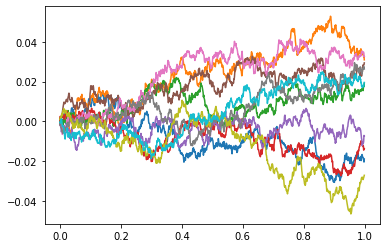

In [53]:
def simulate_wiener_process(initial_value=0, t0=0, t1=1, delta_t=0.001, n_processes=1):
    n_steps = int((t1-t0) / delta_t)
    std = np.sqrt(delta_t)
    noise = np.random.normal(loc=0, scale=std, size=(n_processes, n_steps))
    acum_noise = np.cumsum(noise, axis=1)
    return np.arange(t0, t1, delta_t), initial_value + std * acum_noise
    
n_processes = 10
t, trayectories = simulate_wiener_process(n_processes=n_processes)
for trayectory in trayectories:  
    plt.plot(t, trayectory)
